In [1]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web

In [2]:
doge = web.DataReader('ELON-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-23,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,523817,0.000000e+00
2021-04-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,51157783,0.000000e+00
2021-04-25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,14962631,0.000000e+00
2021-04-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,30621745,0.000000e+00
2021-04-27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37492592,0.000000e+00
...,...,...,...,...,...,...
2022-04-27,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,41203445,1.000000e-06
2022-04-28,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,32333064,1.000000e-06
2022-04-29,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,34279213,1.000000e-06


In [3]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('lstmelon.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

            High           Low          Open         Close    Volume  \
0   2.000000e-06  2.000000e-06  2.000000e-06  2.000000e-06  28411316   
1   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   8614416   
2   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06   8764455   
3   1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06  15698350   
4   2.000000e-06  2.000000e-06  2.000000e-06  2.000000e-06  18802843   
..           ...           ...           ...           ...       ...   
57  1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06  47114985   
58  1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06  34279213   
59  1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06  25056237   
60  1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06  33291619   
61  1.000000e-06  1.000000e-06  1.000000e-06  1.000000e-06  26147666   

       Adj Close  Polarity Score  
0   2.000000e-06        0.095867  
1   1.000000e-06        0.146020  
2   1.000000e-06        0.1381

In [4]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [5]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [6]:
n_train

47

In [7]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [8]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [9]:
X_test

array([[9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 4.12034450e+07,
        9.99999997e-07, 1.48283467e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 1.30700530e+07,
        9.99999997e-07, 1.31502325e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.40005620e+07,
        9.99999997e-07, 1.53586280e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 3.23330640e+07,
        9.99999997e-07, 1.28670540e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 4.71149850e+07,
        9.99999997e-07, 1.14973180e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 3.42792130e+07,
        9.99999997e-07, 1.31015680e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 2.50562370e+07,
        9.99999997e-07, 1.07060620e-01],
       [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 3.32916190e+07,
        9.99999997e-07, 1.41039940e-01]])

In [10]:
y_test

array([9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.99999997e-07])

In [11]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [12]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [13]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)


In [14]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4992      
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=20,
                                        verbose=1,
                                        validation_data=val_data_gen)

Epoch 1/20


C:\Users\moham\AppData\Local\Temp/ipykernel_22544/192094070.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


10/10 [==============================] - 4s 90ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 1.4591e-04 - val_mse: 1.4591e-04
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 8.5763e-04 - val_mse: 8.5763e-04
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 5.0514e-04 - val_mse: 5.0514e-04
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 3.0997e-04 - val_mse: 3.0997e-04
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 4.4913e-04 - val_mse: 4.4913e-04
Epoch 8/20
10/10 [==============================] - 0s

In [16]:
pred = model_lstm.predict(test_data_gen)

In [17]:
test_data_gen[0]

(array([[[9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 4.12034450e+07,
          9.99999997e-07, 1.48283467e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 1.30700530e+07,
          9.99999997e-07, 1.31502325e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.40005620e+07,
          9.99999997e-07, 1.53586280e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 3.23330640e+07,
          9.99999997e-07, 1.28670540e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 4.71149850e+07,
          9.99999997e-07, 1.14973180e-01]],
 
        [[9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 1.30700530e+07,
          9.99999997e-07, 1.31502325e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 9.40005620e+07,
          9.99999997e-07, 1.53586280e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 3.23330640e+07,
          9.99999997e-07, 1.28670540e-01],
         [9.99999997e-07, 9.99999997e-07, 9.99999997e-07, 4.7

In [18]:
pred

array([[0.0019552],
       [0.0019552],
       [0.0019552]], dtype=float32)

In [19]:
import matplotlib.pyplot as plt

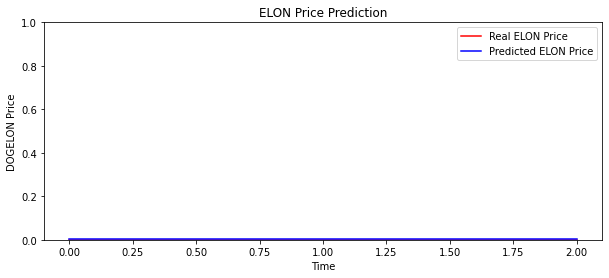

In [20]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real ELON Price')
plt.plot(pred, color = 'blue', label = 'Predicted ELON Price')
plt.title('ELON Price Prediction')
plt.xlabel('Time')
plt.ylabel('DOGELON Price')
plt.ylim(0,1)
plt.legend()
plt.show()